# Big Data Project: Real Estate Risk Score Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# __

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point
# __

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Random Forest resisting on overfit, capture non linear tedencies in the data
from sklearn.ensemble import RandomForestClassifier

# Logistic model
from sklearn.linear_model import LogisticRegression

# To upgrape and estimated the model to have a better score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import streamlit as st
import plotly.express as px

# __
from pivottablejs import pivot_ui

### **1. Step: Loading Housing Dataset (Base Dataset)**

In [2]:
#df = pd.read_csv("/Users/jannikherrlich/Documents/Datasets Big Data/RES.csv", low_memory=False)
df = pd.read_csv("RES.csv", low_memory=False)

In [3]:
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1097625,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1097626,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
1097627,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


### 1.2 Exploratory Data Analysis (EDA) for Base Dataset

In [4]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [6]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06


In [7]:
df.isna().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending=False)

OPM remarks         0.988128
Assessor Remarks    0.844002
Location            0.728405
Non Use Code        0.714429
Residential Type    0.362954
Property Type       0.348429
Address             0.000046
Date Recorded       0.000002
Serial Number       0.000000
List Year           0.000000
Town                0.000000
Assessed Value      0.000000
Sale Amount         0.000000
Sales Ratio         0.000000
dtype: float64

In [9]:
# Excluding OPM remarks & Assessor Remarks, because of high missing values
# Drop one or more columns by name
df = df.drop(columns=["OPM remarks", "Assessor Remarks", "Non Use Code", "Location"])

In [10]:
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
1097625,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
1097626,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
1097627,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


In [11]:
# Cleaning Dataframe
df_clean = df[(df["Sale Amount"].notna()) & (df["Town"].notna())]

# Convertir explicitement en datetime
df["Date Recorded"] = pd.to_datetime(df["Date Recorded"], errors="coerce", format="%m/%d/%Y")

print(df["Date Recorded"].dtype)  # Doit afficher datetime64[ns]

# Ajouter l'année
df_clean["Date Recorded"] = pd.to_datetime(df_clean["Date Recorded"], errors='coerce')
df_clean["Year"] = df_clean["Date Recorded"].dt.year

datetime64[ns]


In [12]:
# Filling Na's of cleaned dataframe with 0
df_clean["Year"] = df_clean["Year"].fillna(0)
df_clean["Property Type"] = df_clean["Property Type"].fillna('No Information')
df_clean["Residential Type"] = df_clean["Residential Type"].fillna('No Information')
df_clean["Address"] = df_clean["Address"].fillna('No Information')
#df_clean["Date Recorded"] = df_clean["Date Recorded"].fillna('No Information')

In [13]:
# Example: Turn comma numbers into integers
df_clean["Year"] = df_clean["Year"].fillna(0).astype(int)

# Rename Columns
df_clean.rename(columns={'Date Recorded': 'Transaction Date'}, inplace=True)

In [14]:
df_clean

,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,2023
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,No Information,2021
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,2022
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021
...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020


### 1.3 Checking Missing Data in Df_clean Dataset

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097629 non-null  int64         
 1   List Year         1097629 non-null  int64         
 2   Transaction Date  1097627 non-null  datetime64[ns]
 3   Town              1097629 non-null  object        
 4   Address           1097629 non-null  object        
 5   Assessed Value    1097629 non-null  float64       
 6   Sale Amount       1097629 non-null  float64       
 7   Sales Ratio       1097629 non-null  float64       
 8   Property Type     1097629 non-null  object        
 9   Residential Type  1097629 non-null  object        
 10  Year              1097629 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(4)
memory usage: 87.9+ MB


In [16]:
df_clean.loc[:, "Transaction Date"] = pd.to_datetime(df_clean["Transaction Date"], format="%Y%m%d")

In [17]:
df_clean["Town"] = df_clean["Town"].astype("string")
df_clean["Address"] = df_clean["Address"].astype("string")
df_clean["Property Type"] = df_clean["Property Type"].astype("string")
df_clean["Residential Type"] = df_clean["Residential Type"].astype("string")

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097629 non-null  int64         
 1   List Year         1097629 non-null  int64         
 2   Transaction Date  1097627 non-null  datetime64[ns]
 3   Town              1097629 non-null  string        
 4   Address           1097629 non-null  string        
 5   Assessed Value    1097629 non-null  float64       
 6   Sale Amount       1097629 non-null  float64       
 7   Sales Ratio       1097629 non-null  float64       
 8   Property Type     1097629 non-null  string        
 9   Residential Type  1097629 non-null  string        
 10  Year              1097629 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), string(4)
memory usage: 87.9 MB


In [19]:
df_clean.isna().sum()

Serial Number       0
List Year           0
Transaction Date    2
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Year                0
dtype: int64

In [20]:
df_clean.isnull().mean().sort_values(ascending=False)

Transaction Date    0.000002
Serial Number       0.000000
List Year           0.000000
Town                0.000000
Address             0.000000
Assessed Value      0.000000
Sale Amount         0.000000
Sales Ratio         0.000000
Property Type       0.000000
Residential Type    0.000000
Year                0.000000
dtype: float64

## **Step 2: Define User Stories & Scope**

As a real estate investor, I want to compare market risks across cities so that I can avoid high-risk regions.

As a portfolio manager, I want to view trends over time to anticipate real estate downturns.

## **Step 3: Loading Datasets for Unemployment & Mortgage Rates**

### **3.1 Unemployment Dataset**

[source](?)
- State FIPS code: 01 to 56
- State abbreviation: AL to WY
- State name: Alabama to Wyoming
- Series ID: Statistic Field Identifier
- Metric code: 
- Year: Year
- Period code:
- Period name: 


In [21]:
# Load Dataset Unemloyment Connecticut
# Load with correct delimiter
#unemp_data = pd.read_csv('/Users/jannikherrlich/Documents/Datasets Big Data/Unemployment Connecticut.csv', delimiter=';')
unemp_data = pd.read_csv('Unemployment Connecticut.csv', delimiter=';')
unemp_data

,State FIPS code,State abbreviation,State name,Series ID,Metric code,Year,Period code,Period name,Metric name,Value,Update date
0,1,AL,Alabama,LAUST010000000000003,3,1986,M07,01.07.86,unemployment rate,"9,6",01.07.86
1,1,AL,Alabama,LAUST010000000000004,4,1995,M03,01.03.95,unemployment,119462,01.03.95
2,1,AL,Alabama,LAUST010000000000004,4,2016,M11,01.11.16,unemployment,116946,01.11.16
3,1,AL,Alabama,LAUST010000000000007,7,2001,M02,01.02.01,employment-population ratio,"59,8",01.02.01
4,1,AL,Alabama,LAUST010000000000008,8,1976,M03,01.03.76,labor force participation rate,"56,2",01.03.76
...,...,...,...,...,...,...,...,...,...,...,...
150331,72,PR,Puerto Rico,LAUST720000000000005,5,2016,M09,01.09.16,employment,967731,01.09.16
150332,72,PR,Puerto Rico,LAUST720000000000004,4,2003,M10,01.10.03,unemployment,155574,01.10.03
150333,72,PR,Puerto Rico,LAUST720000000000004,4,2016,M08,01.08.16,unemployment,132516,01.08.16
150334,72,PR,Puerto Rico,LAUST720000000000004,4,1987,M08,01.08.87,unemployment,172176,01.08.87


In [22]:
# Filter rows where 'State' column equals 'Connecticut'
unemp_con = unemp_data[(unemp_data['State name'] == 'Connecticut') & (unemp_data['Metric name'] == 'unemployment rate') & (unemp_data['Year'] >= 2001)]

# Drop unwanted columns by name
unemp_con = unemp_con.drop(columns=['State FIPS code','State abbreviation ', 'State name', 'Metric code', 'Series ID', 'Update date'])

# Rename columns
unemp_con.rename(columns={'Value': 'Unemployment Rate', 'Period code': 'Month'}, inplace=True)

unemp_con

,Year,Month,Period name,Metric name,Unemployment Rate
18440,2004,M05,01.05.04,unemployment rate,"5,1"
18447,2004,M06,01.06.04,unemployment rate,"5,2"
18454,2007,M08,01.08.07,unemployment rate,"4,5"
18474,2007,M07,01.07.07,unemployment rate,"4,8"
18518,2004,M07,01.07.04,unemployment rate,"5,3"
...,...,...,...,...,...
21278,2022,M08,01.08.22,unemployment rate,4
21283,2009,M07,01.07.09,unemployment rate,"8,6"
21284,2023,M01,01.01.23,unemployment rate,"3,9"
21286,2022,M10,01.10.22,unemployment rate,"3,5"


### 3.1.1 Checking missing value for Unemployment Dataset

In [23]:
unemp_con.isna().sum()

Year                 0
Month                0
Period name          0
Metric name          0
Unemployment Rate    0
dtype: int64

### **3.2 Interest Rate Dataset (Mortgage Rate)**

[source](https://www.fhfa.gov/data/national-mortgage-database-aggregate-statistics)
[description](https://www.fhfa.gov/document/NMDB-Aggregate-Statistics-Data-Dictionary-Technical-Notes.pdf)
- SOURCE: Data Source (NMDB)
- FREQUENCY: Frequency of the Series (Annual, **Quarterly**, Monthly)
- SERIESID: Statistic Field Identifier
- GEOLEVEL
- GEOID
- GEONAME
- MARKET
- PERIOD
- QUARTER
- MONTH
- SUPPRESSED
- State FIPS code: 01 to 56
- State abbreviation: AL to WY
- State name: Alabama to Wyoming



In [24]:
# Load Mortgage Rates Dataset
#mortgage_data = pd.read_csv('/Users/jannikherrlich/Documents/Datasets Big Data/nmdb-new-mortgage-statistics-state-annual.csv')
mortgage_data = pd.read_csv('nmdb-new-mortgage-statistics-state-annual.csv')
mortgage_data

,SOURCE,FREQUENCY,SERIESID,GEOLEVEL,GEOID,GEONAME,MARKET,PERIOD,YEAR,QUARTER,MONTH,SUPPRESSED,VALUE1,VALUE2
0,NMDB,Annual,TOT_ORIG,State,AK,Alaska,All Mortgages,1998,1998,4,12,0,26.0,NaN
1,NMDB,Annual,TOT_ORIG,State,AK,Alaska,All Mortgages (Home Purchase),1998,1998,4,12,0,13.0,NaN
2,NMDB,Annual,TOT_ORIG,State,AK,Alaska,All Mortgages (Refinance),1998,1998,4,12,0,13.0,NaN
3,NMDB,Annual,TOT_ORIG,State,AK,Alaska,All Mortgages,1999,1999,4,12,0,19.0,NaN
4,NMDB,Annual,TOT_ORIG,State,AK,Alaska,All Mortgages (Home Purchase),1999,1999,4,12,0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148055,NMDB,Annual,PCT_MULTIBOR,State,WY,Wyoming,Other Conventional Market (Home Purchase),2022,2022,4,12,0,1.3,0.4
2148056,NMDB,Annual,PCT_MULTIBOR,State,WY,Wyoming,Other Conventional Market (Refinance),2022,2022,4,12,0,0.0,0.0
2148057,NMDB,Annual,PCT_MULTIBOR,State,WY,Wyoming,Other Conventional Market,2023,2023,4,12,0,0.0,0.0
2148058,NMDB,Annual,PCT_MULTIBOR,State,WY,Wyoming,Other Conventional Market (Home Purchase),2023,2023,4,12,0,0.0,0.0


### 3.2.1 Exploratory Data Analysis (EDA) for Mortgage Dataset

In [25]:
# Filter rows where 'State' column equals 'Connecticut' & year >= 2001
mortgage_con = mortgage_data[(mortgage_data['GEONAME'] == 'Connecticut') & (mortgage_data['MARKET'] == 'All Mortgages') & (mortgage_data['YEAR'] >= 2001)]
mortgage_con

,SOURCE,FREQUENCY,SERIESID,GEOLEVEL,GEOID,GEONAME,MARKET,PERIOD,YEAR,QUARTER,MONTH,SUPPRESSED,VALUE1,VALUE2
477,NMDB,Annual,TOT_ORIG,State,CT,Connecticut,All Mortgages,2001,2001,4,12,0,158.0,NaN
480,NMDB,Annual,TOT_ORIG,State,CT,Connecticut,All Mortgages,2002,2002,4,12,0,198.0,NaN
483,NMDB,Annual,TOT_ORIG,State,CT,Connecticut,All Mortgages,2003,2003,4,12,0,284.0,NaN
486,NMDB,Annual,TOT_ORIG,State,CT,Connecticut,All Mortgages,2004,2004,4,12,0,164.0,NaN
489,NMDB,Annual,TOT_ORIG,State,CT,Connecticut,All Mortgages,2005,2005,4,12,0,155.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112790,NMDB,Annual,PCT_MULTIBOR,State,CT,Connecticut,All Mortgages,2019,2019,4,12,0,0.7,0.8
2112793,NMDB,Annual,PCT_MULTIBOR,State,CT,Connecticut,All Mortgages,2020,2020,4,12,0,0.3,0.3
2112796,NMDB,Annual,PCT_MULTIBOR,State,CT,Connecticut,All Mortgages,2021,2021,4,12,0,0.3,0.4
2112799,NMDB,Annual,PCT_MULTIBOR,State,CT,Connecticut,All Mortgages,2022,2022,4,12,0,0.8,1.0


In [26]:
# Drop unwanted columns by name & rename remaining columns
mortgage_con = mortgage_con.drop(columns=['SOURCE', 'FREQUENCY', 'SERIESID', 'GEOLEVEL', 'GEOID', 'GEONAME', 'MARKET', 'QUARTER', 'SUPPRESSED', 'VALUE2', 'PERIOD'], errors='ignore')
mortgage_con

,YEAR,MONTH,VALUE1
477,2001,12,158.0
480,2002,12,198.0
483,2003,12,284.0
486,2004,12,164.0
489,2005,12,155.0
...,...,...,...
2112790,2019,12,0.7
2112793,2020,12,0.3
2112796,2021,12,0.3
2112799,2022,12,0.8


### 3.2.2 Checking missing values for Mortgage Dataset

In [27]:
mortgage_con.isnull().mean().sort_values(ascending=False)

VALUE1    0.026087
YEAR      0.000000
MONTH     0.000000
dtype: float64

In [28]:
# Filling Na's of cleaned dataframe with 0 & the mean
mean_value = mortgage_con["VALUE1"].mean()
mortgage_con["VALUE1"] = mortgage_con["VALUE1"].fillna(mean_value)
mortgage_con

,YEAR,MONTH,VALUE1
477,2001,12,158.0
480,2002,12,198.0
483,2003,12,284.0
486,2004,12,164.0
489,2005,12,155.0
...,...,...,...
2112790,2019,12,0.7
2112793,2020,12,0.3
2112796,2021,12,0.3
2112799,2022,12,0.8


## **Step 4: Merging Base, Mortgage & Unemployment Datasets**

In [29]:
#df_clean.rename(columns={'Date Recorded': 'Date'}, inplace=True)
#unemp_con.rename(columns={'Value': 'Unemployment Rate', 'Period code': 'Date'}, inplace=True)
unemp_con.rename(columns={'Value': 'Unemployment Rate'}, inplace=True)
#mortgage_con.rename(columns={'VALUE1': 'Mortgage Value', 'YEAR': 'Year', 'MONTH': 'Month'}, inplace=True)
mortgage_con.rename(columns={'VALUE1': 'Mortgage Value', 'YEAR': 'Year'}, inplace=True)

# Filter
unemp_con = unemp_con[['Year', 'Unemployment Rate']]
mortgage_con = mortgage_con[['Year', 'Mortgage Value']]

In [30]:
unemp_con.head()

,Year,Unemployment Rate
18440,2004,"5,1"
18447,2004,"5,2"
18454,2007,"4,5"
18474,2007,"4,8"
18518,2004,"5,3"


In [31]:
#unemp_con['Unemployment Rate'] = unemp_con['Unemployment Rate'].str.replace(",", ".").astype(float)
unemp_con["Unemployment Rate"] = unemp_con["Unemployment Rate"].str.replace(",", ".").astype(float)

C:\Users\eric-\AppData\Local\Temp\ipykernel_75988\1357033771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_con["Unemployment Rate"] = unemp_con["Unemployment Rate"].str.replace(",", ".").astype(float)


In [32]:
unemp_con.head()

,Year,Unemployment Rate
18440,2004,5.1
18447,2004,5.2
18454,2007,4.5
18474,2007,4.8
18518,2004,5.3


In [33]:
unemp_con['Year'].unique()

array([2004, 2007, 2010, 2020, 2001, 2017, 2008, 2011, 2015, 2012, 2003,
       2013, 2005, 2014, 2006, 2021, 2023, 2009, 2019, 2016, 2018, 2002,
       2022], dtype=int64)

In [34]:
unemp_con['Year'].nunique()

23

In [35]:
unemp_con['Year'].value_counts()

Year
2004    12
2005    12
2002    12
2018    12
2016    12
2019    12
2009    12
2023    12
2021    12
2006    12
2014    12
2013    12
2007    12
2003    12
2012    12
2015    12
2011    12
2008    12
2017    12
2001    12
2020    12
2010    12
2022    12
Name: count, dtype: int64

In [36]:
unemp_con = unemp_con.groupby("Year", as_index=False).mean()

In [37]:
unemp_con['Year'].value_counts()

Year
2001    1
2013    1
2022    1
2021    1
2020    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
2012    1
2002    1
2011    1
2010    1
2009    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2023    1
Name: count, dtype: int64

In [38]:
unemp_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               23 non-null     int64  
 1   Unemployment Rate  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


In [39]:
mortgage_con = mortgage_con.groupby('Year').mean()

# put "Year" in the column
mortgage_con = mortgage_con.groupby("Year").mean().reset_index()

In [40]:
mortgage_con.head()

,Year,Mortgage Value
0,2001,637.573914
1,2002,814.677247
2,2003,1119.960580
3,2004,679.786667
4,2005,729.825000


In [41]:
mortgage_con['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [42]:
mortgage_con['Year'].nunique()

23

In [43]:
mortgage_con['Year'].value_counts()

Year
2001    1
2013    1
2022    1
2021    1
2020    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
2012    1
2002    1
2011    1
2010    1
2009    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2023    1
Name: count, dtype: int64

In [44]:
mortgage_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            23 non-null     int64  
 1   Mortgage Value  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


In [45]:
df_clean

,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,2023
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,No Information,2021
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,2022
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021
...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020


In [46]:
df_clean['Year'].unique()

array([2023, 2021, 2020, 2022, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019,    0, 1999])

In [47]:
df_clean['Year'].nunique()

25

In [48]:
# Merge datasets
df_merged = df_clean.merge(unemp_con, on=['Year'], how='left')\
                      .merge(mortgage_con, on=['Year'], how='left')

df_merged

,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year,Unemployment Rate,Mortgage Value
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,2023,3.208333,342.758333
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,No Information,2021,6.475000,851.511667
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,2020,7.983333,717.053333
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,2022,4.050000,523.630000
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,2021,6.475000,851.511667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,2020,7.983333,717.053333
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,2019,3.575000,424.601667
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,2020,7.983333,717.053333
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,2020,7.983333,717.053333


### 4.1 Exploratory Data Analysis (EDA) for merged dataset 

In [49]:
df_merged.groupby(['Year']).size().sort_values(ascending=False).head()

Year
2005    79566
2004    73943
2021    64441
2020    62534
2002    60207
dtype: int64

In [50]:
df_merged.groupby(['Year', 'Unemployment Rate']).size().sort_values(ascending=False).head()

Year  Unemployment Rate
2005  4.858333             79566
2004  5.041667             73943
2021  6.475000             64441
2020  7.983333             62534
2002  4.350000             60207
dtype: int64

In [51]:
df_merged.groupby(['Year', 'Mortgage Value']).size().sort_values(ascending=False).head()

Year  Mortgage Value
2005  729.825000        79566
2004  679.786667        73943
2021  851.511667        64441
2020  717.053333        62534
2002  814.677247        60207
dtype: int64

## **Step 5: Feature Engineering**

In [52]:
# Sales-2-Assessment Ratio
df_merged['Sales Ratio'] = df_merged['Sale Amount'] / df_merged['Assessed Value']
avg_ratio = df_merged.groupby('Town')['Sales Ratio'].mean()

# Convert dates and extract year
df_merged['Transaction Date'] = pd.to_datetime(df_merged['Transaction Date'], errors='coerce')
df_merged['Year'] = df_merged['Transaction Date'].dt.year

# Compute yearly volatility for each town
yearly_volatility = df_merged.groupby(['Town', 'Year'])['Sale Amount'].std().reset_index()

# Now compute average yearly volatility per town
avg_volatility_by_town = yearly_volatility.groupby('Town')['Sale Amount'].mean().reset_index()
avg_volatility_by_town.columns = ['Town', 'avg_volatility_by_town']  # ✅ nommer proprement

# Merge into df_merged
df_merged = df_merged.merge(avg_volatility_by_town, on='Town', how='left')

In [53]:
df_merged

,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year,Unemployment Rate,Mortgage Value,avg_volatility_by_town
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,1.668825,Residential,Single Family,2023.0,3.208333,342.758333,1.416452e+05
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,2.159468,Commercial,No Information,2021.0,6.475000,851.511667,1.922503e+05
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,1.699605,Residential,Single Family,2020.0,7.983333,717.053333,2.692246e+05
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,2.441391,Residential,Single Family,2022.0,4.050000,523.630000,6.995574e+05
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,1.379601,Residential,Condo,2021.0,6.475000,851.511667,6.995574e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,0.878994,Single Family,Single Family,2020.0,7.983333,717.053333,6.840540e+05
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,1.113064,Single Family,Single Family,2019.0,3.575000,424.601667,1.066431e+06
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,1.729107,Single Family,Single Family,2020.0,7.983333,717.053333,9.222262e+05
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,1.376869,Single Family,Single Family,2020.0,7.983333,717.053333,6.724826e+05


In [54]:
# Check columns
print(df_merged.columns)

Index(['Serial Number', 'List Year', 'Transaction Date', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Year', 'Unemployment Rate', 'Mortgage Value',
       'avg_volatility_by_town'],
      dtype='object')


In [55]:
# Compute average unemployment per Town-Year
#avg_unemployment = df_merged.groupby(['Town', 'Year'])['Unemployment Rate'].mean().reset_index()

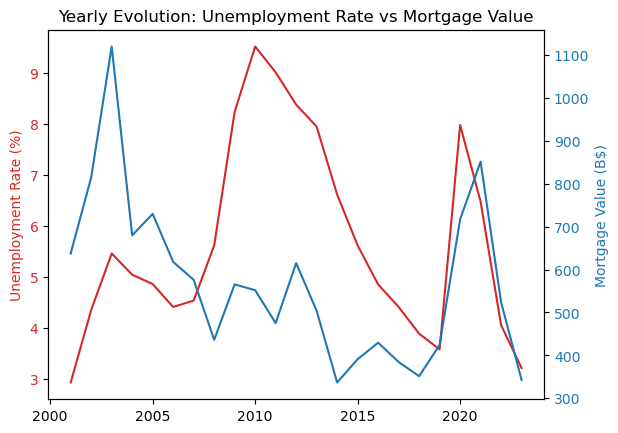

In [56]:
annual_means = df_merged.groupby("Year")[["Unemployment Rate", "Mortgage Value"]].mean()

fig, ax1 = plt.subplots()

ax1.plot(annual_means.index, annual_means["Unemployment Rate"], label="Unemployment Rate", color="tab:red")
ax1.set_ylabel("Unemployment Rate (%)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.plot(annual_means.index, annual_means["Mortgage Value"], label="Mortgage Value", color="tab:blue")
ax2.set_ylabel("Mortgage Value (B$)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Yearly Evolution: Unemployment Rate vs Mortgage Value")
plt.show()

## **Step 5: Risk Scoring Model**

In [57]:
cols_to_scale = ["Unemployment Rate", "Mortgage Value", "avg_volatility_by_town"]
df_scale = df_merged[cols_to_scale].copy()

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scale)

df_scale = pd.DataFrame(scaled_array, columns=cols_to_scale, index=df_merged.index)

df_merged[["Unemployment_scaled", "Mortgage_scaled", "Volatility_scaled"]] = df_scale

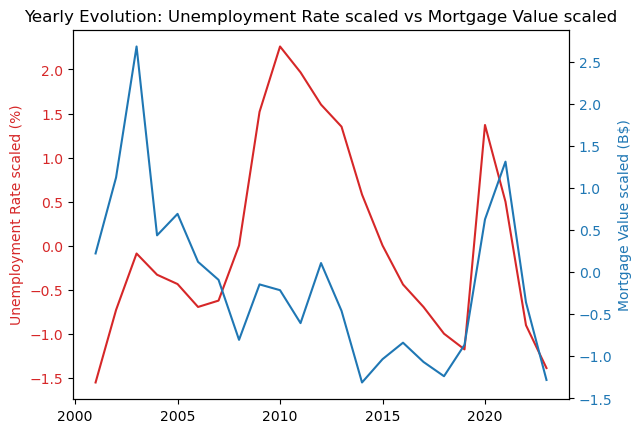

In [58]:
annual_means = df_merged.groupby("Year")[["Unemployment_scaled", "Mortgage_scaled"]].mean()

fig, ax1 = plt.subplots()

ax1.plot(annual_means.index, annual_means["Unemployment_scaled"], label="Unemployment scaled", color="tab:red")
ax1.set_ylabel("Unemployment Rate scaled (%)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.plot(annual_means.index, annual_means["Mortgage_scaled"], label="Mortgage scaled", color="tab:blue")
ax2.set_ylabel("Mortgage Value scaled (B$)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Yearly Evolution: Unemployment Rate scaled vs Mortgage Value scaled")
plt.show()

In [59]:
# Building Risk Scoring Model
def calculate_risk_score(row):
    weights = {
        #'crime_rate': 0.3,
        'Unemployment Rate': 0.3,
        'avg_volatility_by_town': 0.4,
        'Mortgage Value': 0.3,
        
    }
    return (#weights['crime_rate'] * row['crime_rate'] +
            weights['Unemployment Rate'] * row['Unemployment Rate'] +
            weights['avg_volatility_by_town'] * row['avg_volatility_by_town'] +
            weights['Mortgage Value'] * row['Mortgage Value'])

In [60]:
def calculate_scaled_risk(row):
    weights = {
        'Unemployment_scaled': 0.3,
        'Volatility_scaled': 0.4,
        'Mortgage_scaled': 0.3
    }
    return (
        weights['Unemployment_scaled'] * row['Unemployment_scaled'] +
        weights['Volatility_scaled'] * row['Volatility_scaled'] +
        weights['Mortgage_scaled'] * row['Mortgage_scaled']
    )

In [61]:
df_merged['risk_score'] = df_merged.apply(calculate_risk_score, axis = 1)

In [62]:
df_merged['risk_score_scaled'] = df_merged.apply(calculate_scaled_risk, axis = 1)

In [63]:
df_merged

,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year,Unemployment Rate,Mortgage Value,avg_volatility_by_town,Unemployment_scaled,Mortgage_scaled,Volatility_scaled,risk_score,risk_score_scaled
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,1.668825,Residential,Single Family,2023.0,3.208333,342.758333,1.416452e+05,-1.385572,-1.281173,-0.639494,56761.868207,-1.055821
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,2.159468,Commercial,No Information,2021.0,6.475000,851.511667,1.922503e+05,0.499992,1.310962,-0.596558,77157.525100,0.304663
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,1.699605,Residential,Single Family,2020.0,7.983333,717.053333,2.692246e+05,1.370622,0.625887,-0.531250,107907.351323,0.386453
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,2.441391,Residential,Single Family,2022.0,4.050000,523.630000,6.995574e+05,-0.899750,-0.359619,-0.166135,279981.258884,-0.444265
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,1.379601,Residential,Condo,2021.0,6.475000,851.511667,6.995574e+05,0.499992,1.310962,-0.166135,280080.350884,0.476832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,0.878994,Single Family,Single Family,2020.0,7.983333,717.053333,6.840540e+05,1.370622,0.625887,-0.179289,273839.117093,0.527237
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,1.113064,Single Family,Single Family,2019.0,3.575000,424.601667,1.066431e+06,-1.173927,-0.864175,0.145138,426700.843039,-0.553376
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,1.729107,Single Family,Single Family,2020.0,7.983333,717.053333,9.222262e+05,1.370622,0.625887,0.022788,369107.973454,0.608068
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,1.376869,Single Family,Single Family,2020.0,7.983333,717.053333,6.724826e+05,1.370622,0.625887,-0.189107,269210.561049,0.523310


#### Assumption
- 1 → very risky
- ≈ 0 → average risk
- < -1 → very low risk

In [70]:
df_merged['risk_category'] = pd.cut(
    df_merged['risk_score_scaled'],
    bins=[-np.inf, -0.5, 0.5, np.inf],
    labels=['Safe', 'Neutral', 'Risky']
)

In [72]:
df_merged.groupby('risk_category').count()

C:\Users\eric-\AppData\Local\Temp\ipykernel_75988\2704691666.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Serial Number,List Year,Transaction Date,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year,Unemployment Rate,Mortgage Value,avg_volatility_by_town,Unemployment_scaled,Mortgage_scaled,Volatility_scaled,risk_score,risk_score_scaled
risk_category,,,,,,,,,,,,,,,,,,,
Safe,217493,217493,217493,217493,217493,217493,217493,217472,217493,217493,217493,217493,217493,217493,217493,217493,217493,217493,217493
Neutral,689385,689385,689385,689385,689385,689385,689385,689150,689385,689385,689385,689385,689385,689385,689385,689385,689385,689385,689385
Risky,190747,190747,190747,190747,190747,190747,190747,190718,190747,190747,190747,190747,190747,190747,190747,190747,190747,190747,190747


In [73]:
# export
#df_merged.to_csv('housing_risk.csv')

## **Step 6: Visualization Dashboard**

In [65]:
st.title('Real Estate Market Risk Analyzer')

city = st.selectbox('Select a City', df_merged['Town'].unique())
filtered = df_merged[df_merged['Town'] == city]

st.metric(label='Current Risk Score scaled', value = round(filtered['risk_score'].mean(), 2))

fig = px.line(filtered, x = 'Transaction Date', y='risk_score', title='Risk over Time')
st.plotly_chart(fig)

2025-05-14 10:24:32.167 
  command:

    streamlit run C:\Users\eric-\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-14 10:24:32.252 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

### To open it
- Go to the cmd/executer/ anaconda prompt
- write that
- pip uninstall streamlit -y
- 
pip cache purg
- 
pip install streaml
- cd /your pat -> mine: cd "%USERPROFILE%\Desktop\Machine Learning"
- streamlit run app.py
 it

In [66]:
st.title('Real Estate Market Risk Analyzer')

city = st.selectbox('Select a City', df_merged['Town'].unique())
filtered = df_merged[df_merged['Town'] == city]

st.metric(label='Current Risk Score', value = round(filtered['risk_score'].mean(), 2))

fig = px.line(filtered, x = 'Transaction Date', y='risk_score', title='Risk over Time')
st.plotly_chart(fig)

DeltaGenerator()

### To open it
- Go to the cmd/executer/ anaconda prompt
- write that
- pip uninstall streamlit -y
- pip cache purge
- pip install streamlil
- cd /your pat -> mine: cd "%USERPROFILE%\Desktop\Machine Learning"
- streamlit run app_scaled.py